features:imd_band, age_band, edu, adjusted_mark

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# load the data
data = pd.read_csv('data/combined-data.csv')

In [ ]:
data.head()
# data.shape

In [2]:
# pre-processing the columns
# change age_band
data["age_band"] = data["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

# preprocess "edu" column
data["edu"] = data["edu"] .map({"Level or lower":0, "HE or higher":1})

# change imd_band 
data["imd_band"] = data["imd_band"].map({"01/10/2020":'', "0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

In [ ]:
pd.DataFrame(data).to_csv('processed-data.csv')

In [3]:
data.dropna(inplace=True)
data.shape

(18187, 16)

In [ ]:
pd.DataFrame(data).to_csv('dropnull-data.csv')

In [4]:
# extract the four features, 'imd_band', 'age_band', 'edu','adjusted_mark'
X = data.iloc[:, [5, 9, 10, 15]]
# X.shape
X.head()

,adjusted_mark,imd_band,age_band,edu
0,48.055203,8,3,1
3,64.006980,9,3,1
4,13.803681,2,1,0
5,73.300000,5,1,0
6,90.340760,5,1,0


In [ ]:
# find the optimal value of k
see = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    see.append(kmeans.inertia_)
plt.plot(range(1, 11), see)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
# plt.show()
plt.savefig('image/elbow.png')


In [ ]:
# k value is 3
km=KMeans(n_clusters=3)
print(km)

In [4]:
# preprocessing using min max scaler
#  'imd_band', 'age_band', 'edu','adjusted_mark'

scaler= MinMaxScaler()

scaler.fit(data[['imd_band']])
data['imd_band'] = scaler.transform(data[['imd_band']])

scaler.fit(data[['age_band']])
data['age_band'] = scaler.transform(data[['age_band']])

scaler.fit(data[['edu']])
data['edu'] = scaler.transform(data[['edu']])

scaler.fit(data[['adjusted_mark']])
data['adjusted_mark'] = scaler.transform(data[['adjusted_mark']])

In [ ]:
pd.DataFrame(data).to_csv('minmaxscaled-data.csv')

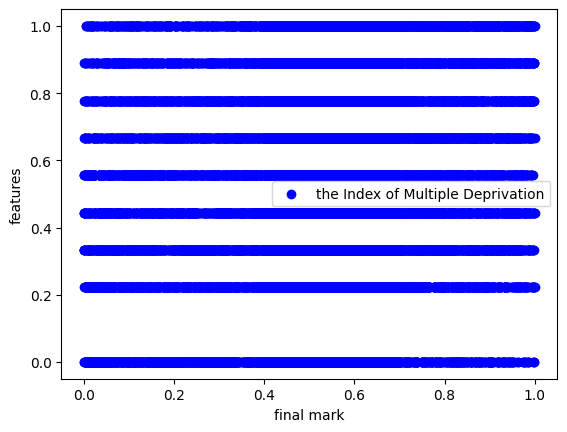

In [14]:
# create a scatter plot with multiple x variables
fig, ax = plt.subplots()
ax.scatter(data['adjusted_mark'],data['imd_band'], color='blue', label='the Index of Multiple Deprivation')
ax.scatter(data['adjusted_mark'], data['age_band'],color='red', label='Age')
ax.scatter(data['adjusted_mark'], data['edu'], color='yellow', label='Previous Education')
ax.legend()
ax.set_xlabel('final mark')
ax.set_ylabel('features')
plt.show()

In [5]:
# extract the four features, 'imd_band', 'age_band', 'edu','adjusted_mark'
predict_data = data.iloc[:, [5, 9, 10, 15]]
# predict_data = data[['imd_band']]
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(predict_data)
y_predicted

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, ..., 0, 0, 2], dtype=int32)

In [6]:
data['cluster'] = y_predicted
data.head()

,Unnamed: 0,id_student,code_module,code_presentation,attempted_weight,adjusted_mark,mark,gender,region,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,edu,cluster
0,0,6516,AAA,2014J,100.0,0.480552,31.8,M,Scotland,0.888889,1.0,0,60,N,Pass,1.0,2
3,3,11391,AAA,2013J,100.0,0.640070,41.2,M,East Anglian Region,1.000000,1.0,0,240,N,Pass,1.0,2
4,4,23629,BBB,2013B,25.0,0.138037,8.3,F,East Anglian Region,0.222222,0.0,2,60,N,Fail,0.0,1
5,5,23698,CCC,2014J,150.0,0.733000,55.0,F,East Anglian Region,0.555556,0.0,0,120,N,Distinction,0.0,0
6,6,23798,BBB,2013J,100.0,0.903408,44.6,M,Wales,0.555556,0.0,0,60,N,Distinction,0.0,0


In [7]:
pd.DataFrame(data).to_csv('clustered-data.csv')

In [8]:
km.cluster_centers_

array([[ 5.58427466e-01,  7.73094040e-01,  1.51739987e-01,
        -5.27355937e-16],
       [ 4.69706236e-01,  2.68154617e-01,  1.29548763e-01,
        -5.82867088e-16],
       [ 5.91681569e-01,  5.91818684e-01,  2.53399668e-01,
         1.00000000e+00]])

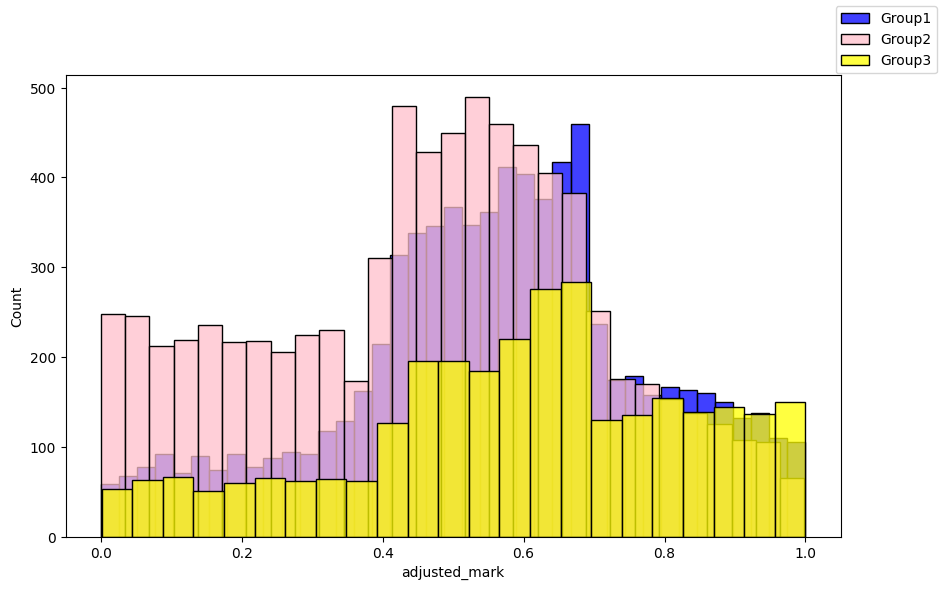

In [10]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
fig = plt.figure(figsize=(10,6))
sns.histplot(df1.adjusted_mark, color='blue')
sns.histplot(df2.adjusted_mark, color='pink')
sns.histplot(df3.adjusted_mark, color='yellow')

fig.legend(labels=['Group1','Group2','Group3'])
# plt.show()
plt.savefig('image/groupclustering.png')

In [14]:
# dividing data to train and test
train_data, test_data = np.split(data.sample(frac=1, random_state=1729), [int(0.8 * len(data))])
print(train_data.shape, test_data.shape)

(14549, 17) (3638, 17)


In [15]:
# write to csv file with combined tables
pd.DataFrame(train_data).to_csv('oulad_train.csv')
pd.DataFrame(test_data).to_csv('oulad_test.csv')

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [24]:
#preprocessing train data for Apriori
# 'imd_band'>=0.5 is 1 otherwise 0, means IMD>=50% is 1, 'age_band'>=0.5 is 1 otherwise 0 means >=35 is 1, 
def encode_units(x):
    if x >=0.5:
        return 1
    else:
        return 0
# 'adjusted_mark'>=0.4 is 1 means pass, otherwise 0
def encode_units_2(x):
    if x >=0.4:
        return 1
    else:
        return 0

train_data['imd_band'] = train_data['imd_band'].map(encode_units)
train_data['age_band'] = train_data['age_band'].map(encode_units)
train_data['adjusted_mark'] = train_data['adjusted_mark'].map(encode_units_2)
train_data['edu'] = train_data['edu'].map(encode_units)

train_data[['imd_band', 'age_band', 'edu','adjusted_mark']]


,imd_band,age_band,edu,adjusted_mark
614,0,0,0,1
781,1,1,0,1
16201,0,0,1,1
23012,1,1,0,0
7392,1,0,0,1
...,...,...,...,...
19769,0,1,0,1
24535,0,0,1,1
25539,1,0,0,0
11548,0,0,1,1


In [25]:
# after dividing train_data to 3 groups using Apriori to find frequent itemset
# Apriori: if A happen, the chance of result B happen
# Apply Apriori on each cluster separately
train_df1 = train_data[train_data.cluster==0]
train_df2 = train_data[train_data.cluster==1]
train_df3 = train_data[train_data.cluster==2]

rule 1 is :
rule 2 is :
rule 3 is :


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(edu),(imd_band),1.000000,0.594921,0.594921,0.594921,1.000000,0.000000,1.000000,0.000000
1,(imd_band),(edu),0.594921,1.000000,0.594921,1.000000,1.000000,0.000000,inf,0.000000
2,(adjusted_mark),(imd_band),0.818068,0.594921,0.503331,0.615267,1.034200,0.016645,1.052884,0.181766
3,(imd_band),(adjusted_mark),0.594921,0.818068,0.503331,0.846046,1.034200,0.016645,1.181729,0.081636
4,(edu),(age_band),1.000000,0.468360,0.468360,0.468360,1.000000,0.000000,1.000000,0.000000
5,(age_band),(edu),0.468360,1.000000,0.468360,1.000000,1.000000,0.000000,inf,0.000000
6,(adjusted_mark),(age_band),0.818068,0.468360,0.385928,0.471756,1.007251,0.002778,1.006429,0.039568
7,(age_band),(adjusted_mark),0.468360,0.818068,0.385928,0.824000,1.007251,0.002778,1.033703,0.013541
8,(adjusted_mark),(edu),0.818068,1.000000,0.818068,1.000000,1.000000,0.000000,inf,0.000000
9,(edu),(adjusted_mark),1.000000,0.818068,0.818068,0.818068,1.000000,0.000000,1.000000,0.000000


In [26]:
# Define Apriori parameters
min_support = 0.3
# max_len = 2

# Run Apriori on the first cluster
freq_items1 = apriori(train_df1[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 1 is: ")
freq_items1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.996205,(imd_band),1
1,0.804983,(adjusted_mark),1
2,0.801188,"(adjusted_mark, imd_band)",2


In [29]:
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [27]:
# Run Apriori on the second cluster
freq_items2 = apriori(train_df2[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items2['length'] = freq_items2['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 2 is: ")
freq_items2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.666776,(adjusted_mark),1


In [30]:
rules2 = association_rules(freq_items2, metric="lift", min_threshold=1)
print("rule 2 is :")
rules2

rule 2 is :


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [28]:
freq_items3 = apriori(train_df3[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items3['length'] = freq_items3['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 3 is: ")
freq_items3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.594921,(imd_band),1
1,0.468360,(age_band),1
2,1.000000,(edu),1
3,0.818068,(adjusted_mark),1
4,0.594921,"(edu, imd_band)",2
5,0.503331,"(adjusted_mark, imd_band)",2
6,0.468360,"(edu, age_band)",2
7,0.385928,"(adjusted_mark, age_band)",2
8,0.818068,"(adjusted_mark, edu)",2
9,0.503331,"(adjusted_mark, edu, imd_band)",3


In [31]:
rules3 = association_rules(freq_items3, metric="lift", min_threshold=1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(edu),(imd_band),1.000000,0.594921,0.594921,0.594921,1.000000,0.000000,1.000000,0.000000
1,(imd_band),(edu),0.594921,1.000000,0.594921,1.000000,1.000000,0.000000,inf,0.000000
2,(adjusted_mark),(imd_band),0.818068,0.594921,0.503331,0.615267,1.034200,0.016645,1.052884,0.181766
3,(imd_band),(adjusted_mark),0.594921,0.818068,0.503331,0.846046,1.034200,0.016645,1.181729,0.081636
4,(edu),(age_band),1.000000,0.468360,0.468360,0.468360,1.000000,0.000000,1.000000,0.000000
5,(age_band),(edu),0.468360,1.000000,0.468360,1.000000,1.000000,0.000000,inf,0.000000
6,(adjusted_mark),(age_band),0.818068,0.468360,0.385928,0.471756,1.007251,0.002778,1.006429,0.039568
7,(age_band),(adjusted_mark),0.468360,0.818068,0.385928,0.824000,1.007251,0.002778,1.033703,0.013541
8,(adjusted_mark),(edu),0.818068,1.000000,0.818068,1.000000,1.000000,0.000000,inf,0.000000
9,(edu),(adjusted_mark),1.000000,0.818068,0.818068,0.818068,1.000000,0.000000,1.000000,0.000000


In [34]:
#preprocessing test data for Apriori
# 'imd_band'>=0.5 is 1 otherwise 0, means IMD>=50% is 1, 'age_band'>=0.5 is 1 otherwise 0 means >=35 is 1, 
def encode_units(x):
    if x >=0.5:
        return 1
    else:
        return 0
# 'adjusted_mark'>=0.4 is 1 means pass, otherwise 0
def encode_units_2(x):
    if x >=0.4:
        return 1
    else:
        return 0

test_data['imd_band'] = test_data['imd_band'].map(encode_units)
test_data['age_band'] = test_data['age_band'].map(encode_units)
test_data['adjusted_mark'] = test_data['adjusted_mark'].map(encode_units_2)
test_data['edu'] = test_data['edu'].map(encode_units)

new_data = test_data[['imd_band', 'age_band', 'edu','cluster']]
new_data

,imd_band,age_band,edu,cluster
10130,0,1,0,1
1752,1,0,0,0
2856,0,0,0,1
11323,0,0,0,1
21485,0,0,0,1
...,...,...,...,...
19025,1,0,0,1
16538,1,0,0,0
1794,0,0,0,1
4496,0,1,0,1


In [37]:
# Loop through each cluster and each data point to apply the rules
# test data 

new_data = test_data[['imd_band', 'age_band', 'edu']]
# Apply the association rules to the new data
antecedent = set(rules3['antecedents'])
consequent = set(rules3['consequents'])
confidence = rules3['confidence']
    
# Check if the antecedent of the rule holds for each instance of new data
for _, instance in new_data.iterrows():
    if antecedent.issubset(set(instance)):
        # If the antecedent holds, predict the consequent with probability given by the rule's confidence
        print(f"Instance {instance} predicts {consequent}")

TypeError: unhashable type: 'Series'

In [ ]:

# Define Apriori parameters
min_support = 0.3
# max_len = 2

# Run Apriori on the first cluster
freq_items1 = apriori(train_df1[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 1 is: ")
# freq_items1
# Generate association rules for the first cluster
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
print("rule 1 is :")
rules1
# Run Apriori on the second cluster
freq_items2 = apriori(train_df2[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items2['length'] = freq_items2['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 2 is: ")
# freq_items2
# Generate association rules for the second cluster
rules2 = association_rules(freq_items2, metric="lift", min_threshold=1)
print("rule 2 is :")
rules2
# Run Apriori on the third cluster
freq_items3 = apriori(train_df3[['imd_band', 'age_band', 'edu','adjusted_mark']], min_support=min_support, use_colnames=True)
freq_items3['length'] = freq_items3['itemsets'].apply(lambda x: len(x))
# print("frequent itemset 3 is: ")
# freq_items3
# Generate association rules for the third cluster
rules3 = association_rules(freq_items3, metric="lift", min_threshold=1)
print("rule 3 is :")
rules3

<Axes: >

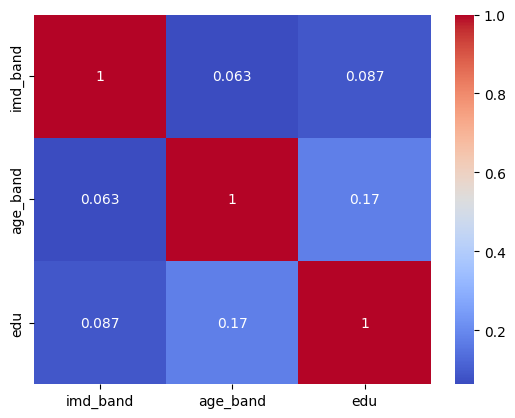

In [13]:
# create correlation matrix
columns=['imd_band', 'age_band', 'edu','adjusted_mark']
corr_matrix = data[columns].corr()

# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')